In [1]:
import anndata as ad
import scipy
import os
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt

In [9]:
file_paths = ['/media/CSO/corelab/instrument/10x/xenium/XETG00110/raw/2024/20241120__175841__BO_IMMUNOLOGY_MOUSE_5k/output-XETG00110__0050705__Region_1__20241120__180035',
'/media/CSO/corelab/instrument/10x/xenium/XETG00110/raw/2024/20241120__175841__BO_IMMUNOLOGY_MOUSE_5k/output-XETG00110__0050705__Region_2__20241120__180036',
'/media/CSO/corelab/instrument/10x/xenium/XETG00110/raw/2024/20241120__175841__BO_IMMUNOLOGY_MOUSE_5k/output-XETG00110__0050705__Region_3__20241120__180036',
'/media/CSO/corelab/instrument/10x/xenium/XETG00110/raw/2024/20241120__175841__BO_IMMUNOLOGY_MOUSE_5k/output-XETG00110__0050714__Region_1__20241120__180036',
'/media/CSO/corelab/instrument/10x/xenium/XETG00110/raw/2024/20241120__175841__BO_IMMUNOLOGY_MOUSE_5k/output-XETG00110__0050714__Region_2__20241120__180036',
'/media/CSO/corelab/instrument/10x/xenium/XETG00110/raw/2024/20241120__175841__BO_IMMUNOLOGY_MOUSE_5k/output-XETG00110__0050714__Region_3__20241120__180036',
'/media/CSO/corelab/instrument/10x/xenium/XETG00110/raw/2024/20241120__175841__BO_IMMUNOLOGY_MOUSE_5k/output-XETG00110__0050714__Region_4__20241120__180036']

AnnData object with n_obs × n_vars = 291035 × 13780
    obs: 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method'
    uns: 'spatial'
    obsm: 'spatial'


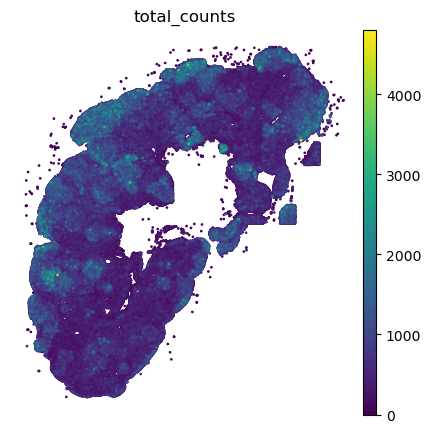

AnnData object with n_obs × n_vars = 116280 × 13780
    obs: 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method'
    uns: 'spatial'
    obsm: 'spatial'


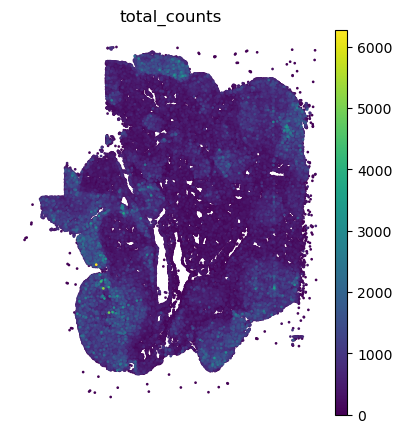

AnnData object with n_obs × n_vars = 307794 × 13780
    obs: 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method'
    uns: 'spatial'
    obsm: 'spatial'


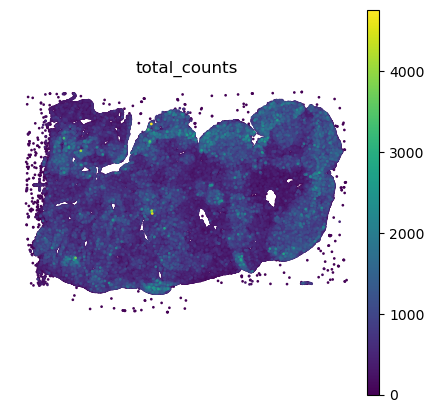

AnnData object with n_obs × n_vars = 140193 × 13780
    obs: 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method'
    uns: 'spatial'
    obsm: 'spatial'


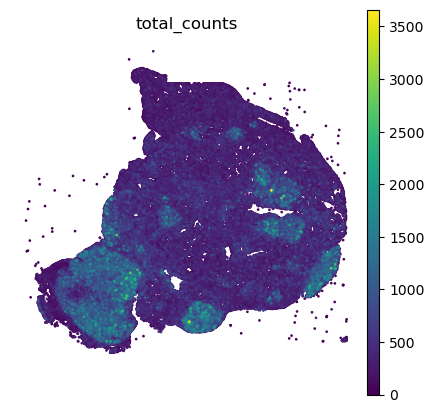

AnnData object with n_obs × n_vars = 94053 × 13780
    obs: 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method'
    uns: 'spatial'
    obsm: 'spatial'


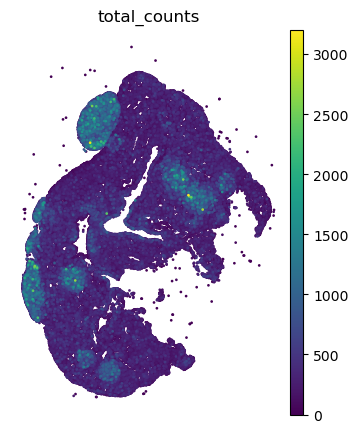

AnnData object with n_obs × n_vars = 174354 × 13780
    obs: 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method'
    uns: 'spatial'
    obsm: 'spatial'


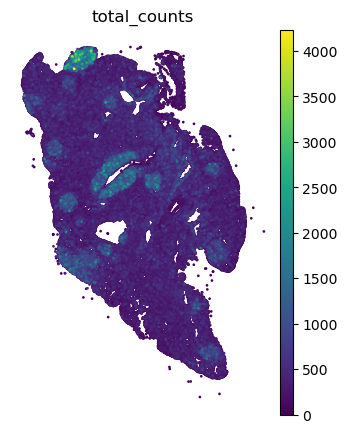

AnnData object with n_obs × n_vars = 150207 × 13780
    obs: 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method'
    uns: 'spatial'
    obsm: 'spatial'


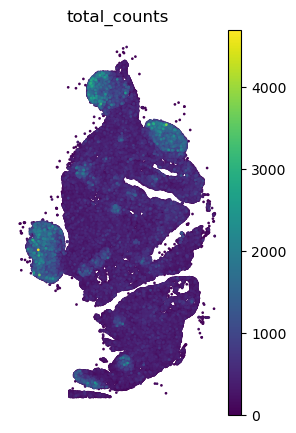

In [10]:
adatas = []
counter = 1
for file in file_paths:
    expmat_path = os.path.join(file,'cell_feature_matrix/')
    expmat = scipy.io.mmread(f'{expmat_path}/matrix.mtx.gz')
    expmat = expmat.transpose().tocsr()

    meta_path = os.path.join(file,'cells.csv.gz')
    meta = pd.read_csv(meta_path)
    meta.head()

    features = pd.read_csv(f'{expmat_path}/features.tsv.gz', sep='\t', compression='gzip', header=None)
    var_names = features.iloc[:, 1].tolist()

    adata = sc.AnnData(X=expmat)
    adata.var_names = var_names
    adata.obs = meta.set_index('cell_id')
    adata.obsm['spatial'] = np.array(meta[['x_centroid', 'y_centroid']])
    adata.uns['spatial'] = {'imagecol': adata.obsm['spatial'][:, 0], 'imagerow': adata.obsm['spatial'][:, 1]}
    print(adata)
    adata.obs['batch'] = str(counter)
    counter += 1

    fig, ax = plt.subplots(1, 1, figsize=(5,5))
    sc.pl.embedding(adata, "spatial", color='total_counts', ax=ax, s=15, show=False)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_aspect('equal')
    ax.set_facecolor('white')

    for spine in ax.spines.values():
        spine.set_visible(False)
    plt.show()

    adatas.append(adata)

In [12]:
for adata in adatas:
    sc.pp.filter_cells(adata, min_counts=10)
    sc.pp.filter_genes(adata, min_cells=10)
    sc.pp.normalize_total(adata, inplace=True)
    sc.pp.log1p(adata)

In [13]:
adata = ad.concat(adatas, uns_merge='first')
print(adata)
adata.write_h5ad('adata.h5ad')

/home/lzhang36/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 1260074 × 5042
    obs: 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'batch', 'n_counts'
    uns: 'spatial', 'log1p'
    obsm: 'spatial'
